In [23]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2019_nCoV_data.csv')

In [5]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
Sno               1345 non-null int64
Date              1345 non-null object
Province/State    992 non-null object
Country           1345 non-null object
Last Update       1345 non-null object
Confirmed         1345 non-null float64
Deaths            1345 non-null float64
Recovered         1345 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 84.2+ KB


In [8]:
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Sno'],axis=1,inplace=True)
df.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [11]:
split_date = df[df['Date'] > pd.Timestamp(date(2020,2,9))]
split_date.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1055,2020-02-09 23:20:00,Hubei,Mainland China,2020-02-09 23:33:02,29631.0,871.0,1795.0
1056,2020-02-09 23:20:00,Guangdong,Mainland China,2020-02-10 03:43:20,1151.0,1.0,147.0
1057,2020-02-09 23:20:00,Zhejiang,Mainland China,2020-02-10 01:13:06,1092.0,0.0,201.0
1058,2020-02-09 23:20:00,Henan,Mainland China,2020-02-10 01:13:06,1073.0,6.0,169.0
1059,2020-02-09 23:20:00,Hunan,Mainland China,2020-02-10 02:13:16,879.0,1.0,186.0


In [12]:
print('Casos confirmados no mundo: ',df['Confirmed'].sum())
print('Mortos no mundo: ',df['Deaths'].sum())
print('Casos de recuperação no mundo: ',df['Recovered'].sum())

Casos confirmados no mundo:  436625.0
Mortos no mundo:  9631.0
Casos de recuperação no mundo:  28293.0


In [13]:
china = df[df['Country']=='Mainland China'][["Province/State","Confirmed","Deaths","Recovered"]]


In [46]:
china = china.groupby('Province/State').sum().sort_values(by='Confirmed', ascending=False)

In [49]:
china[:10]

,Confirmed,Deaths,Recovered
Province/State,,,
Hubei,308665.0,9264.0,15834.0
Zhejiang,13772.0,0.0,1733.0
Guangdong,13604.0,7.0,1296.0
Henan,12091.0,62.0,1257.0
Hunan,10356.0,7.0,1461.0
Anhui,8868.0,16.0,614.0
Jiangxi,8487.0,4.0,807.0
Chongqing,5988.0,26.0,444.0
Jiangsu,5569.0,0.0,582.0


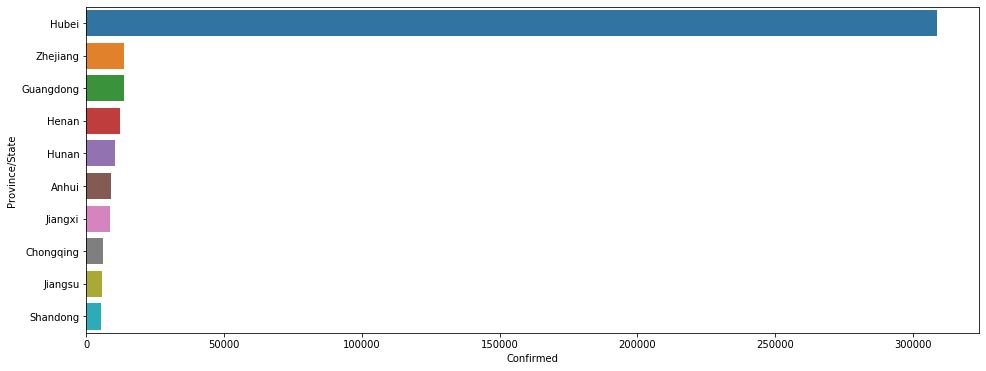

In [81]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Confirmed", y="Province/State", data=china[:10].reset_index(),
            label="Total")


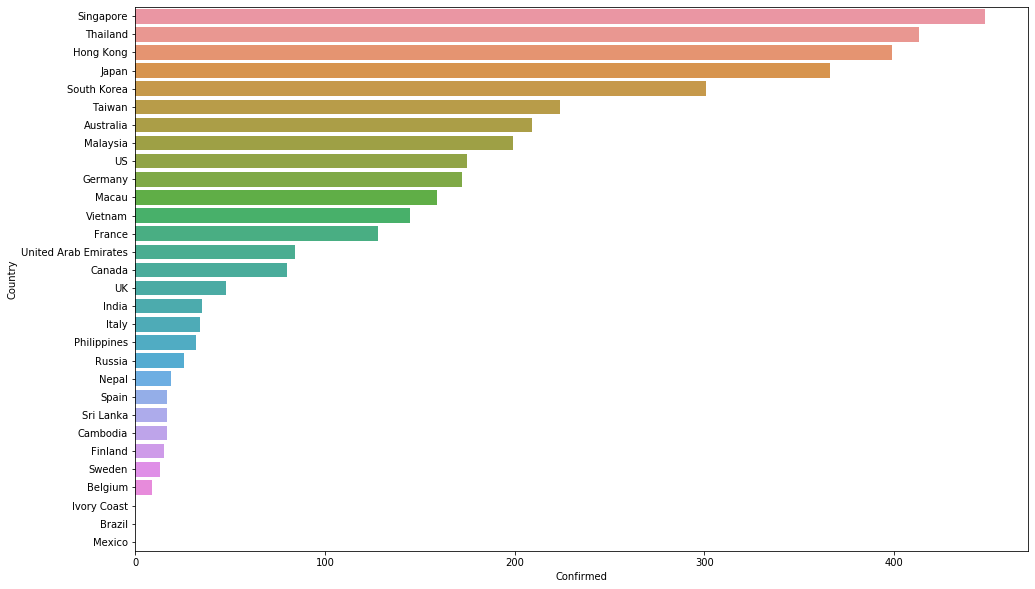

In [83]:
plt.figure(figsize=(16, 10))
sns.barplot(x="Confirmed", y="Country", data=df.groupby('Country').sum().sort_values(by='Confirmed', ascending = False)[3:].reset_index(),
            label="Total")


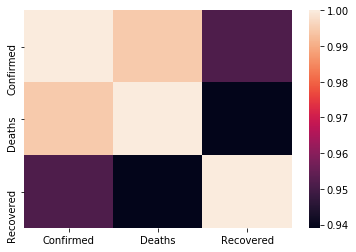

In [25]:
sns.heatmap(df.corr())


In [67]:
spread = df.groupby(by=[pd.Grouper(key='Date', freq='D')]).sum()

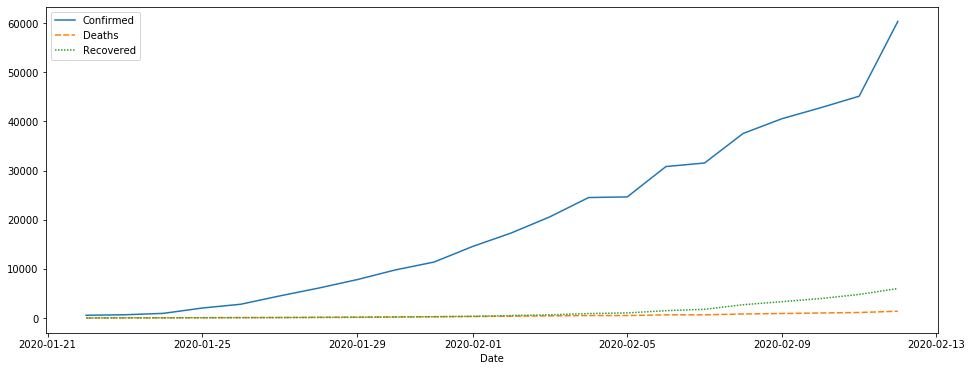

In [73]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=spread)